In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import KNNImputer,IterativeImputer,SimpleImputer
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')

.

In [2]:
df = pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
# no null values

In [6]:
for col in df.columns:
    print(col," : ",len(df[col].unique()))

Age  :  73
Workclass  :  9
Fnlwgt  :  21647
Education  :  16
Education_num  :  16
Marital_status  :  7
Occupation  :  15
Relationship  :  6
Race  :  5
Sex  :  2
Capital_gain  :  119
Capital_loss  :  92
Hours_per_week  :  94
Native_country  :  42
Income  :  2


In [7]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [8]:
df.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [9]:
# ? since it's not defined we treat it as null values 

<Axes: ylabel='Workclass'>

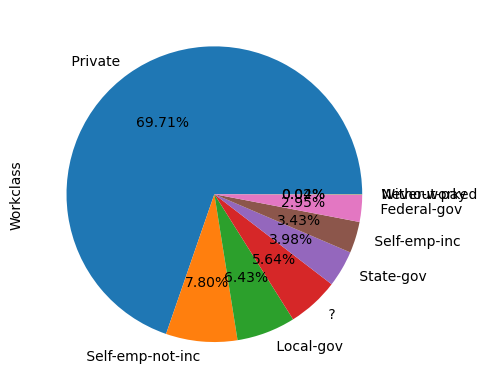

In [10]:
df['Workclass'].value_counts().plot.pie(autopct='%.2f%%')

In [11]:
df.Education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

<Axes: ylabel='Education'>

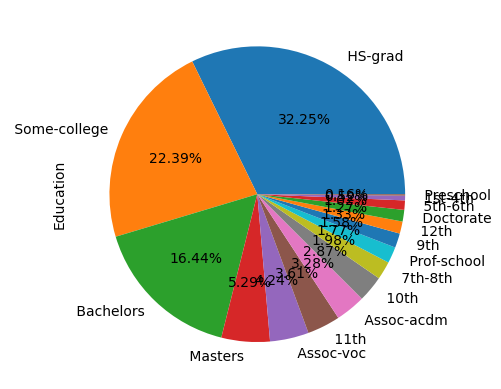

In [12]:
df['Education'].value_counts().plot.pie(autopct='%.2f%%')

In [13]:
df.Education_num.value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

<Axes: ylabel='Education_num'>

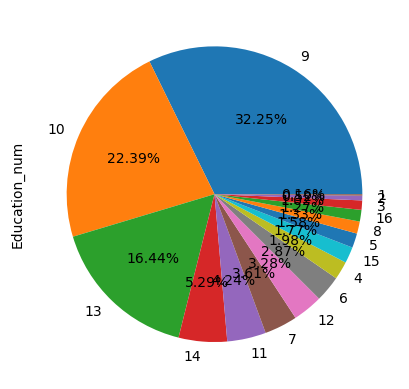

In [14]:
df['Education_num'].value_counts().plot.pie(autopct='%.2f%%')

In [15]:
# education and eduction_num are the same one is string and another one is int so we should drop the string column

In [16]:
df.Marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

<Axes: ylabel='Marital_status'>

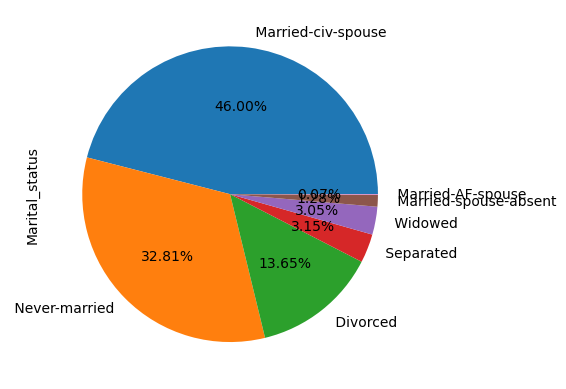

In [17]:
df['Marital_status'].value_counts().plot.pie(autopct='%.2f%%')

In [18]:
df.Occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

<Axes: ylabel='Occupation'>

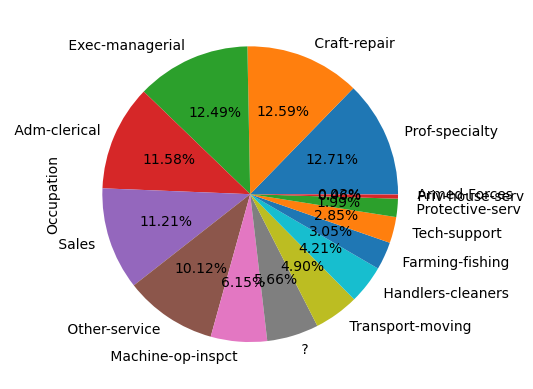

In [19]:
df['Occupation'].value_counts().plot.pie(autopct='%.2f%%')

In [20]:
df.Relationship.value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

<Axes: ylabel='Relationship'>

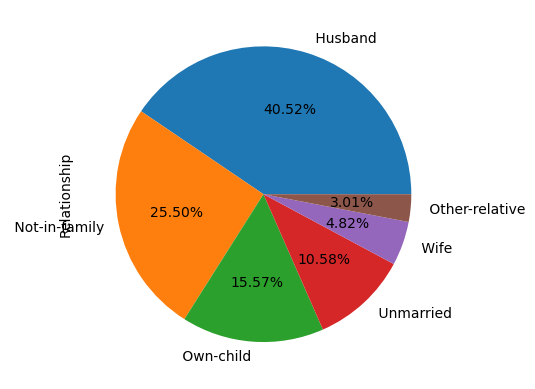

In [21]:
df['Relationship'].value_counts().plot.pie(autopct='%.2f%%')

In [22]:
df.Race.value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

<Axes: ylabel='Race'>

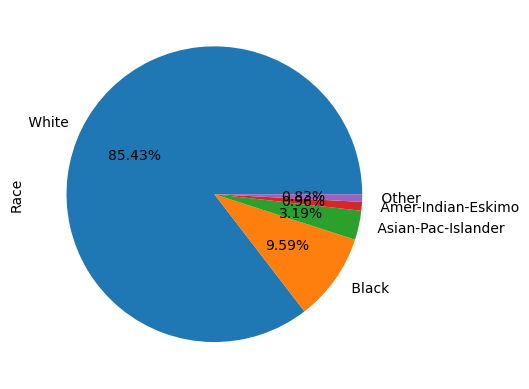

In [23]:
df['Race'].value_counts().plot.pie(autopct='%.2f%%')

In [24]:
df.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

<Axes: ylabel='Income'>

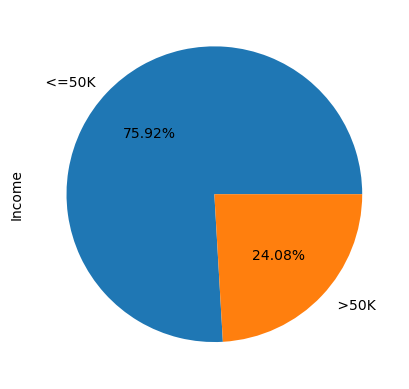

In [25]:
df['Income'].value_counts().plot.pie(autopct='%.2f%%')

In [26]:
# over_sampling or under_sampling is needed 

.

.

.

In [27]:
df.replace('?',np.nan,inplace=True)
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [28]:
df.replace(' ?',np.nan,inplace=True)
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [29]:
# There was space before '?'.

In [30]:
df=df.drop('Education',axis=1)

In [31]:
df.dropna()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [32]:
# droping the nan value will lead to loss of 2400 rows but we will only loose 7.4% of the data
# so we shold drop the nan values

In [33]:
df=df.dropna()

In [34]:
df.shape

(30161, 14)

In [35]:
df=df.drop_duplicates()

In [36]:
df.shape

(30138, 14)

In [37]:
# There were some duplicates present so 23 rows were deleted .

.

.

.

In [38]:
df.Income.value_counts()

 <=50K    22632
 >50K      7506
Name: Income, dtype: int64

In [39]:
df.Income = pd.factorize(df.Income)[0]

In [40]:
df.Income.value_counts()

0    22632
1     7506
Name: Income, dtype: int64

# 0 = <=50K
# 1 = >50K

<Axes: xlabel='Workclass', ylabel='count'>

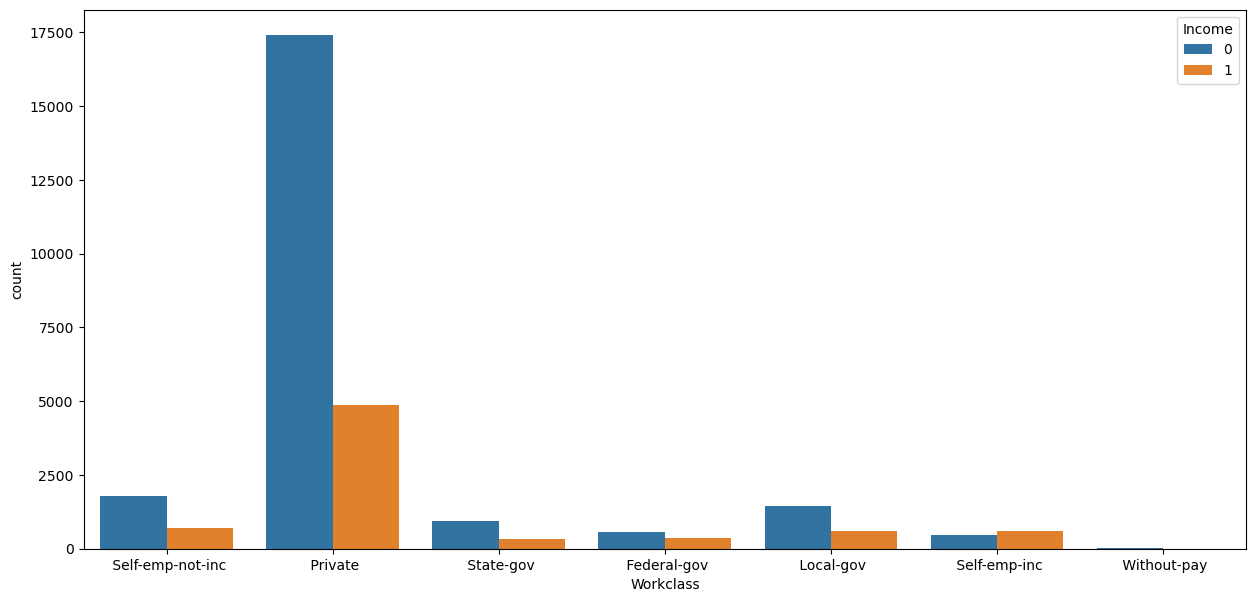

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(x="Workclass",hue='Income',data=df)

<Axes: xlabel='Marital_status', ylabel='count'>

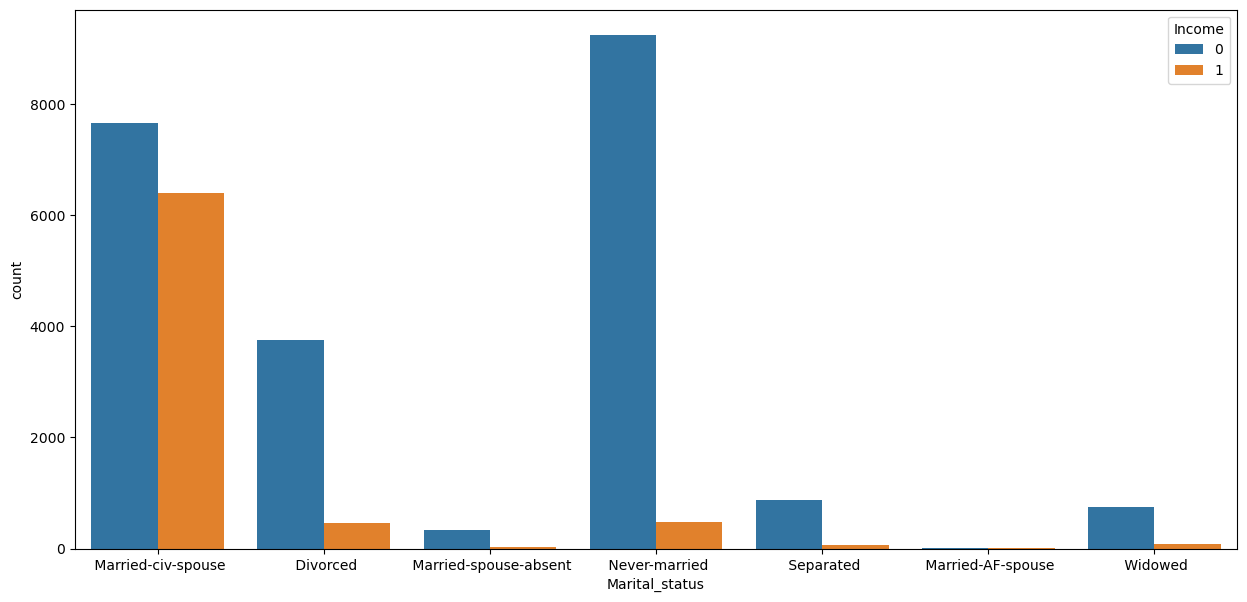

In [42]:
plt.figure(figsize=(15,7))
sns.countplot(x="Marital_status",hue='Income',data=df)

<Axes: xlabel='Relationship', ylabel='count'>

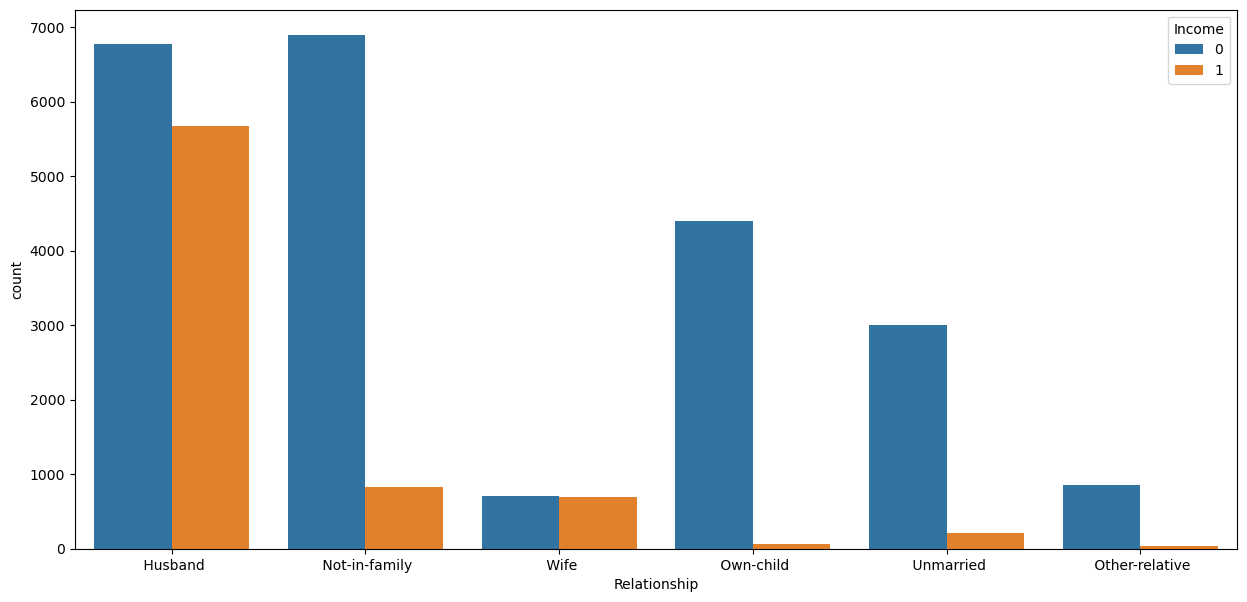

In [43]:
plt.figure(figsize=(15,7))
sns.countplot(x="Relationship",hue='Income',data=df)

<Axes: xlabel='Race', ylabel='count'>

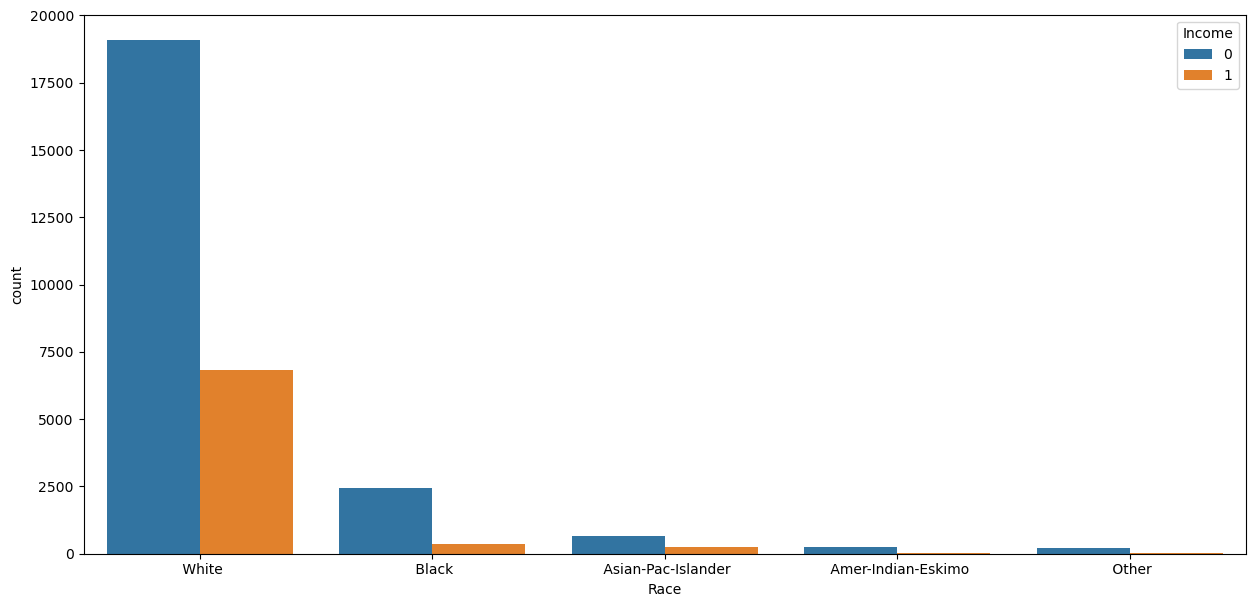

In [44]:
plt.figure(figsize=(15,7))
sns.countplot(x="Race",hue='Income',data=df)

<Axes: xlabel='Sex', ylabel='count'>

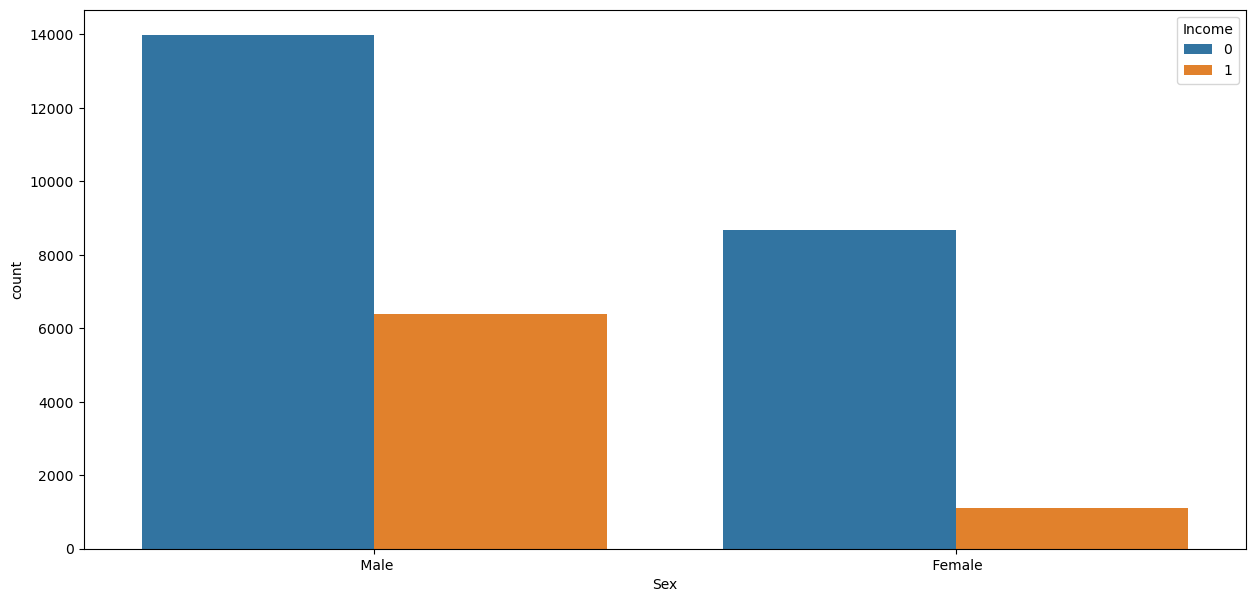

In [45]:
plt.figure(figsize=(15,7))
sns.countplot(x="Sex",hue='Income',data=df)

In [46]:
# White Man in Private sector earn the highest

<Axes: >

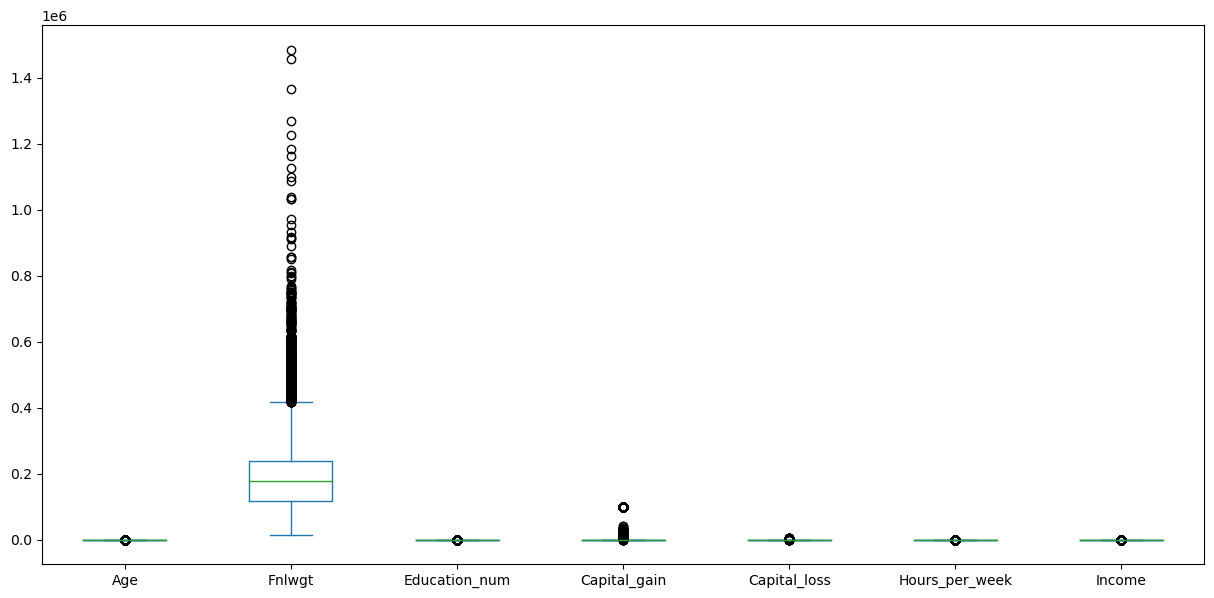

In [47]:
df.plot(kind='box',figsize=(15,7))

In [48]:
df.skew()

Age                0.528967
Fnlwgt             1.460047
Education_num     -0.302794
Capital_gain      11.897934
Capital_loss       4.524323
Hours_per_week     0.332373
Income             1.160593
dtype: float64

In [49]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
count,30138.000000,3.013800e+04,30138.000000,30138.000000,30138.000000,30138.000000,30138.000000
mean,38.441702,1.897988e+05,10.122437,1092.805329,88.442863,40.934734,0.249054
std,13.131643,1.056584e+05,2.548727,7409.230902,404.451628,11.978951,0.432473
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176295e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784190e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376062e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [50]:
# we should delete Capital_gain and Capital_loss since min,25%,50%,75% are 0 but max value is way to high

In [51]:
df=df.drop(['Capital_gain','Capital_loss'],axis=1)

.

.

.

In [52]:
df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0


In [53]:
# Marital_status and Relationship are looking kind of same we should use df.corr() and see how much are they related

In [54]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Hours_per_week',
       'Native_country', 'Income'],
      dtype='object')

In [55]:
df.Workclass = pd.factorize(df.Workclass)[0]
df.Marital_status = pd.factorize(df.Marital_status)[0]
df.Occupation = pd.factorize(df.Occupation)[0]
df.Relationship = pd.factorize(df.Relationship)[0]
df.Race = pd.factorize(df.Race)[0]
df.Sex = pd.factorize(df.Sex)[0]
df.Native_country = pd.factorize(df.Native_country)[0]

In [56]:
df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,0,83311,13,0,0,0,0,0,13,0,0
1,38,1,215646,9,1,1,1,0,0,40,0,0
2,53,1,234721,7,0,1,0,1,0,40,0,0
3,28,1,338409,13,0,2,2,1,1,40,1,0
4,37,1,284582,14,0,0,2,0,1,40,0,0


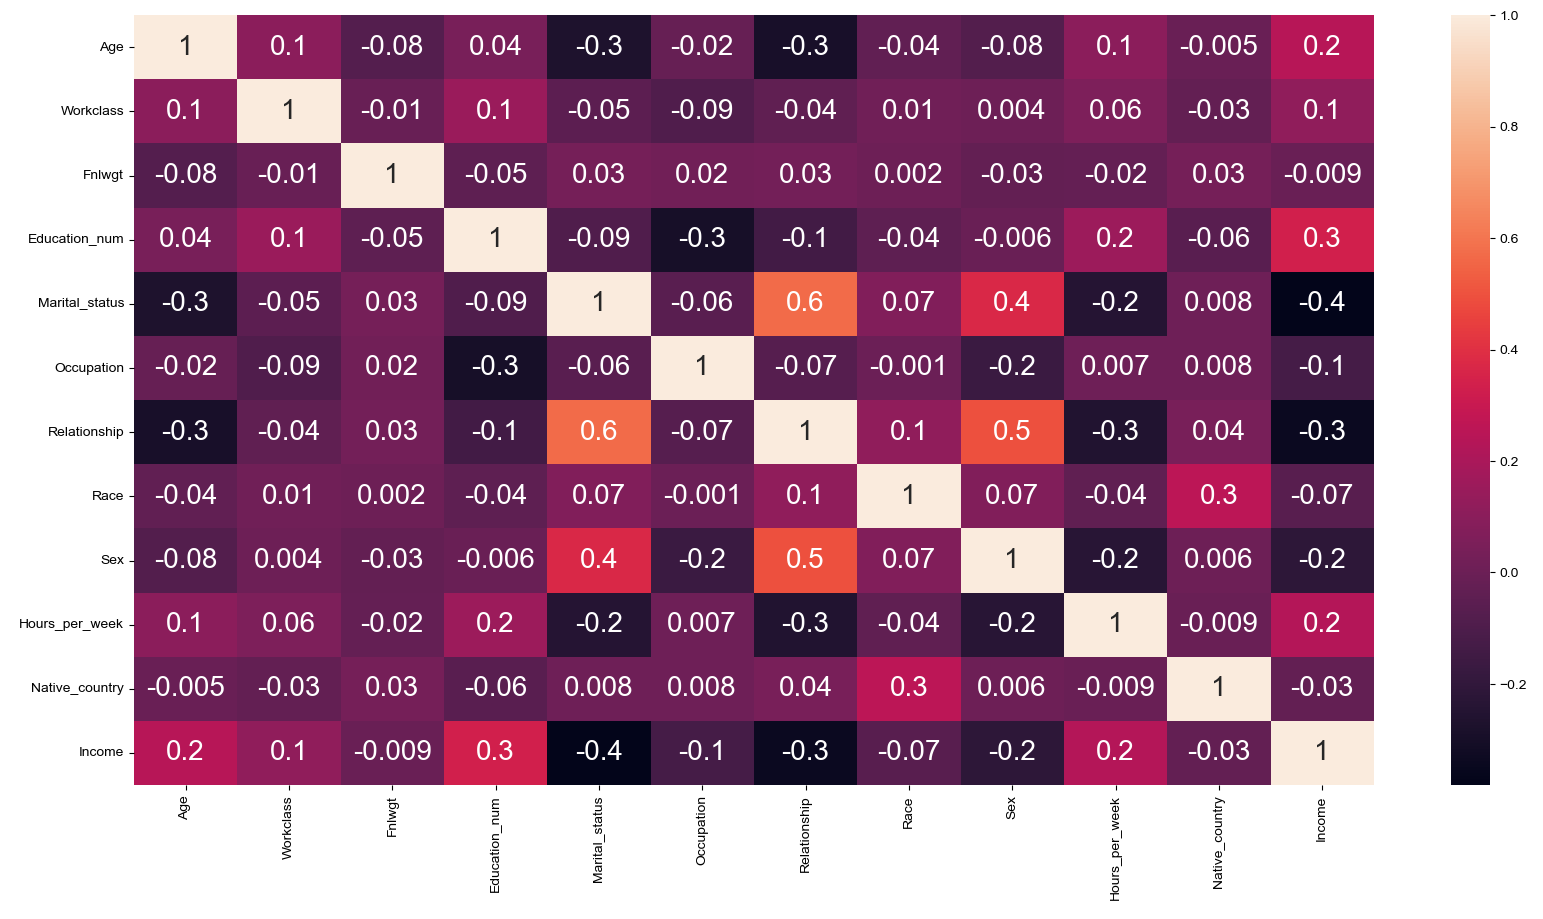

In [57]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':20})
sns.set(font_scale=3)

In [58]:
# Marital_status and Relationship are related 0.6 it's not that high so we will leave it be for now(if model accuracy is not good then we can delete relationship and see if there is any improvement)

In [59]:
df=df.drop('Fnlwgt',axis=1)
df

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,0,13,0,0,0,0,0,13,0,0
1,38,1,9,1,1,1,0,0,40,0,0
2,53,1,7,0,1,0,1,0,40,0,0
3,28,1,13,0,2,2,1,1,40,1,0
4,37,1,14,0,0,2,0,1,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,1,12,0,9,2,0,1,38,0,0
32556,40,1,9,0,8,0,0,0,40,0,1
32557,58,1,9,6,4,4,0,1,40,0,0
32558,22,1,9,3,4,3,0,0,20,0,0


.

.

In [60]:
x=df.drop('Income',axis=1)
y=df.Income

In [61]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1,y1 = sm.fit_resample(x,y)

In [62]:
y1.value_counts()

0    22632
1    22632
Name: Income, dtype: int64

In [63]:
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier , RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [64]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x1,y1, random_state=42,test_size=0.30)

x_train_sca = x_train
x_test_sca = x_test

In [65]:
knn =KNeighborsClassifier()
knn.fit(x_train_sca,y_train)
knny_pred = knn.predict(x_test_sca)

print(accuracy_score(y_test,knny_pred))
print(classification_report(y_test,knny_pred))

recheck = cross_val_score(knn,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,knny_pred) - recheck.mean())

0.8245949926362297
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      6815
           1       0.78      0.90      0.84      6765

    accuracy                           0.82     13580
   macro avg       0.83      0.82      0.82     13580
weighted avg       0.83      0.82      0.82     13580

[0.79495687 0.79412741 0.79927007 0.79973453 0.79873901]
0.7973655764278618
difference 0.02722941620836794


In [66]:
gs = GaussianNB()
gs.fit(x_train_sca,y_train)
gsy_pred = gs.predict(x_test_sca)

print(accuracy_score(y_test,gsy_pred))
print(classification_report(y_test,gsy_pred))

recheck = cross_val_score(gs,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gsy_pred) - recheck.mean())

0.7505891016200295
              precision    recall  f1-score   support

           0       0.79      0.69      0.74      6815
           1       0.72      0.81      0.76      6765

    accuracy                           0.75     13580
   macro avg       0.75      0.75      0.75     13580
weighted avg       0.75      0.75      0.75     13580

[0.74353019 0.75464499 0.73954877 0.74431724 0.74780156]
0.7459685507232494
difference 0.00462055089678004


In [67]:
rfc= RandomForestClassifier()
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print(accuracy_score(y_test,rfcy_pred))
print(classification_report(y_test,rfcy_pred))

recheck = cross_val_score(rfc,x,y,cv=5)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())
print(confusion_matrix(y_test,rfcy_pred))

0.8572901325478645
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      6815
           1       0.84      0.88      0.86      6765

    accuracy                           0.86     13580
   macro avg       0.86      0.86      0.86     13580
weighted avg       0.86      0.86      0.86     13580

[0.81320504 0.81502986 0.81602522 0.82064045 0.81599469]
0.8161790522608448
difference 0.04111108028701971
[[5671 1144]
 [ 794 5971]]


In [68]:
abc =AdaBoostClassifier()
abc.fit(x_train_sca,y_train)
abcy_pred = abc.predict(x_test_sca)

print(accuracy_score(y_test,abcy_pred))
print(classification_report(y_test,abcy_pred))

recheck = cross_val_score(abc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,abcy_pred) - recheck.mean())

0.8222385861561119
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      6815
           1       0.79      0.87      0.83      6765

    accuracy                           0.82     13580
   macro avg       0.83      0.82      0.82     13580
weighted avg       0.83      0.82      0.82     13580

[0.82929662 0.82033842 0.83294625 0.83623693 0.82827277]
0.8294181987294731
difference -0.007179612573361194


In [69]:
gbcbest = GradientBoostingClassifier()
gbcbest.fit(x_train_sca,y_train)
gbcy_pred = gbcbest.predict(x_test_sca)

print(accuracy_score(y_test,gbcy_pred))
print(classification_report(y_test,gbcy_pred))

recheck = cross_val_score(gbcbest,x,y,cv=5)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gbcy_pred) - recheck.mean())

0.8286450662739323
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      6815
           1       0.80      0.88      0.84      6765

    accuracy                           0.83     13580
   macro avg       0.83      0.83      0.83     13580
weighted avg       0.83      0.83      0.83     13580

[0.83344393 0.83360982 0.83775713 0.84104861 0.83573917]
0.8363197341668309
difference -0.007674667892898612


In [70]:
bc = BaggingClassifier()
bc.fit(x_train_sca,y_train)
bcy_pred = bc.predict(x_test_sca)

print(accuracy_score(y_test,bcy_pred))
print(classification_report(y_test,bcy_pred))

recheck = cross_val_score(bc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,bcy_pred) - recheck.mean())

0.8421944035346097
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      6815
           1       0.83      0.86      0.84      6765

    accuracy                           0.84     13580
   macro avg       0.84      0.84      0.84     13580
weighted avg       0.84      0.84      0.84     13580

[0.80408096 0.80325149 0.80159257 0.80736685 0.80471213]
0.8042007989043773
difference 0.03799360463023238


In [71]:
lr = LogisticRegression()
lr.fit(x_train_sca,y_train)
lry_pred = lr.predict(x_test_sca)

print(classification_report(y_test,lry_pred))

recheck = cross_val_score(lr,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,lry_pred) - recheck.mean())

              precision    recall  f1-score   support

           0       0.83      0.74      0.78      6815
           1       0.76      0.84      0.80      6765

    accuracy                           0.79     13580
   macro avg       0.80      0.79      0.79     13580
weighted avg       0.80      0.79      0.79     13580

[0.80856005 0.8120438  0.81502986 0.82246557 0.81566285]
0.814752426291377
difference -0.022410747351759963


In [72]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train_sca,y_train)
dtcy_pred = dtc.predict(x_test_sca)

print(accuracy_score(y_test,dtcy_pred))
print(classification_report(y_test,dtcy_pred))

recheck = cross_val_score(dtc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred) - recheck.mean())

0.8170103092783505
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      6815
           1       0.81      0.83      0.82      6765

    accuracy                           0.82     13580
   macro avg       0.82      0.82      0.82     13580
weighted avg       0.82      0.82      0.82     13580

[0.77322495 0.77936297 0.77621102 0.78148333 0.77185996]
0.7764284453645831
difference 0.04058186391376739


.

.

.

In [73]:
ohe=OneHotEncoder(sparse_output=False).set_output(transform='pandas')

In [74]:
ohetransform = ohe.fit_transform(df[['Workclass','Marital_status','Occupation','Relationship','Race','Sex','Native_country']])

In [75]:
ohetransform

,Workclass_0,Workclass_1,Workclass_2,Workclass_3,Workclass_4,Workclass_5,Workclass_6,Marital_status_0,Marital_status_1,Marital_status_2,...,Native_country_31,Native_country_32,Native_country_33,Native_country_34,Native_country_35,Native_country_36,Native_country_37,Native_country_38,Native_country_39,Native_country_40
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32556,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32557,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32558,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
df = pd.concat([df,ohetransform],axis=1)

In [77]:
df=df.drop(['Workclass','Marital_status','Occupation','Relationship','Race','Sex','Native_country'],axis=1)

In [78]:
df

,Age,Education_num,Hours_per_week,Income,Workclass_0,Workclass_1,Workclass_2,Workclass_3,Workclass_4,Workclass_5,...,Native_country_31,Native_country_32,Native_country_33,Native_country_34,Native_country_35,Native_country_36,Native_country_37,Native_country_38,Native_country_39,Native_country_40
0,50,13,13,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,38,9,40,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53,7,40,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,13,40,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37,14,40,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,12,38,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32556,40,9,40,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32557,58,9,40,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32558,22,9,20,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
x2=df.drop('Income',axis=1)
y2=df.Income

In [80]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x3,y3 = sm.fit_resample(x2,y2)

In [81]:
y3.value_counts()

0    22632
1    22632
Name: Income, dtype: int64

In [82]:
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier , RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [83]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x3,y3, random_state=42,test_size=0.30)

x_train_sca = x_train
x_test_sca = x_test

.

.

In [84]:
knn =KNeighborsClassifier()
knn.fit(x_train_sca,y_train)
knny_pred = knn.predict(x_test_sca)

print(accuracy_score(y_test,knny_pred))
print(classification_report(y_test,knny_pred))

recheck = cross_val_score(knn,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,knny_pred) - recheck.mean())

0.8253313696612665
              precision    recall  f1-score   support

           0       0.92      0.72      0.80      6815
           1       0.77      0.93      0.84      6765

    accuracy                           0.83     13580
   macro avg       0.84      0.83      0.82     13580
weighted avg       0.84      0.83      0.82     13580

[0.79495687 0.79412741 0.79927007 0.79973453 0.79873901]
0.7973655764278618
difference 0.027965793233404757


In [85]:
gs = GaussianNB()
gs.fit(x_train_sca,y_train)
gsy_pred = gs.predict(x_test_sca)

print(accuracy_score(y_test,gsy_pred))
print(classification_report(y_test,gsy_pred))

recheck = cross_val_score(gs,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gsy_pred) - recheck.mean())

0.7134020618556701
              precision    recall  f1-score   support

           0       0.89      0.49      0.63      6815
           1       0.65      0.94      0.77      6765

    accuracy                           0.71     13580
   macro avg       0.77      0.71      0.70     13580
weighted avg       0.77      0.71      0.70     13580

[0.74353019 0.75464499 0.73954877 0.74431724 0.74780156]
0.7459685507232494
difference -0.03256648886757929


In [86]:
rfc= RandomForestClassifier()
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print(accuracy_score(y_test,rfcy_pred))
print(classification_report(y_test,rfcy_pred))

recheck = cross_val_score(rfc,x,y,cv=5)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())
print(confusion_matrix(y_test,rfcy_pred))

0.8766568483063328
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6815
           1       0.87      0.88      0.88      6765

    accuracy                           0.88     13580
   macro avg       0.88      0.88      0.88     13580
weighted avg       0.88      0.88      0.88     13580

[0.8142004  0.81386861 0.81668879 0.81914717 0.81815165]
0.8164113237830779
difference 0.060245524523254934
[[5964  851]
 [ 824 5941]]


In [88]:
abc =AdaBoostClassifier()
abc.fit(x_train_sca,y_train)
abcy_pred = abc.predict(x_test_sca)

print(accuracy_score(y_test,abcy_pred))
print(classification_report(y_test,abcy_pred))

recheck = cross_val_score(abc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,abcy_pred) - recheck.mean())

0.8569955817378497
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      6815
           1       0.83      0.89      0.86      6765

    accuracy                           0.86     13580
   macro avg       0.86      0.86      0.86     13580
weighted avg       0.86      0.86      0.86     13580

[0.82929662 0.82033842 0.83294625 0.83623693 0.82827277]
0.8294181987294731
difference 0.027577383008376644


In [87]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train_sca,y_train)
gbcy_pred = gbc.predict(x_test_sca)

print(accuracy_score(y_test,gbcy_pred))
print(classification_report(y_test,gbcy_pred))

recheck = cross_val_score(gbc,x,y,cv=5)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gbcy_pred) - recheck.mean())

0.8695139911634757
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      6815
           1       0.85      0.90      0.87      6765

    accuracy                           0.87     13580
   macro avg       0.87      0.87      0.87     13580
weighted avg       0.87      0.87      0.87     13580

[0.83344393 0.83360982 0.83775713 0.84104861 0.83573917]
0.8363197341668309
difference 0.0331942569966448


In [89]:
bc = BaggingClassifier()
bc.fit(x_train_sca,y_train)
bcy_pred = bc.predict(x_test_sca)

print(accuracy_score(y_test,bcy_pred))
print(classification_report(y_test,bcy_pred))

recheck = cross_val_score(bc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,bcy_pred) - recheck.mean())

0.8645066273932254
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      6815
           1       0.86      0.86      0.86      6765

    accuracy                           0.86     13580
   macro avg       0.86      0.86      0.86     13580
weighted avg       0.86      0.86      0.86     13580

[0.80109489 0.80640345 0.80706702 0.80769869 0.80703501]
0.8058598120006091
difference 0.05864681539261629


In [90]:
lr = LogisticRegression()
lr.fit(x_train_sca,y_train)
lry_pred = lr.predict(x_test_sca)

print(classification_report(y_test,lry_pred))

recheck = cross_val_score(lr,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,lry_pred) - recheck.mean())

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      6815
           1       0.79      0.85      0.82      6765

    accuracy                           0.82     13580
   macro avg       0.82      0.82      0.82     13580
weighted avg       0.82      0.82      0.82     13580

[0.80856005 0.8120438  0.81502986 0.82246557 0.81566285]
0.814752426291377
difference 0.0007114912343961777


In [91]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train_sca,y_train)
dtcy_pred = dtc.predict(x_test_sca)

print(accuracy_score(y_test,dtcy_pred))
print(classification_report(y_test,dtcy_pred))

recheck = cross_val_score(dtc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred) - recheck.mean())

0.8452135493372607
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      6815
           1       0.84      0.85      0.85      6765

    accuracy                           0.85     13580
   macro avg       0.85      0.85      0.85     13580
weighted avg       0.85      0.85      0.85     13580

[0.77090246 0.77753816 0.77670869 0.78081964 0.77235772]
0.7756653343519744
difference 0.0695482149852863


.

.

.

# gbcbest is the best performing algorithm with the accuracy of 83% and no over/under fitting

In [93]:
import joblib
joblib.dump(gbcbest,'bestmodel.obj')

['bestmodel.obj']